In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import Allgemeine_Funktionen.Funktionen as af

In [56]:
df_houses = pd.read_csv("Melbourne_Housing.csv", sep=",")

In [67]:
df_houses

,Suburb,Address,Rooms,Type,Price_AUD,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-04-02,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,2018-02-24,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,2018-02-24,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,2018-02-24,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,2018-02-24,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [58]:
# check data types
df_houses.dtypes

# Column Date as datetime
df_houses["Date"] = pd.to_datetime(df_houses["Date"])
# Categorial data (Regionname, CouncilArea, Suburb, Type, Method)
df_houses["Regionname"] = df_houses["Regionname"].astype('category')
df_houses["CouncilArea"] = df_houses["CouncilArea"].astype('category')
df_houses["Suburb"] = df_houses["Suburb"].astype('category')
df_houses["Type"] = df_houses["Type"].astype('category')
df_houses["Method"] = df_houses["Method"].astype('category')
# Rename Price to Price_AUD
df_houses.rename(columns={'Price':'Price_AUD'}, inplace=True)

In [59]:
df_houses.describe()

,Rooms,Price_AUD,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [60]:
df_houses[df_houses["Bathroom"]>df_houses["Rooms"]]

,Suburb,Address,Rooms,Type,Price_AUD,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
400,Armadale,10 William St,1,h,1435000.0,SP,Jellis,2016-08-10,6.3,3143.0,...,2.0,1.0,144.0,107.0,1900.0,Stonnington City Council,-37.85640,145.02280,Southern Metropolitan,4836.0
756,Avondale Heights,6 Lovett Dr,4,h,1200000.0,S,Nelson,2016-04-06,10.5,3034.0,...,5.0,4.0,673.0,NaN,NaN,Moonee Valley City Council,-37.75450,144.87360,Western Metropolitan,4502.0
922,Balwyn,1b Threadneedle St,2,h,NaN,PN,Fletchers,2016-05-14,9.7,3103.0,...,3.0,2.0,344.0,NaN,NaN,Boroondara City Council,-37.81180,145.09950,Southern Metropolitan,5682.0
947,Balwyn,49 Metung St,5,h,3400000.0,VB,Jellis,2016-06-18,9.7,3103.0,...,6.0,4.0,739.0,502.0,NaN,Boroondara City Council,-37.80390,145.07140,Southern Metropolitan,5682.0
1004,Balwyn,29 Sevenoaks St,5,h,3900000.0,PI,Jellis,2016-08-28,9.7,3103.0,...,7.0,6.0,0.0,NaN,NaN,Boroondara City Council,-37.80490,145.07480,Southern Metropolitan,5682.0
1860,Brighton,89 South Rd,3,h,2020000.0,S,Nick,2016-09-17,11.2,3186.0,...,6.0,2.0,685.0,419.0,NaN,Bayside City Council,-37.92840,144.99860,Southern Metropolitan,10579.0
1992,Brighton East,5 Margaret St,2,h,1780000.0,SP,Buxton,2016-07-05,10.7,3187.0,...,3.0,2.0,635.0,119.0,1935.0,Bayside City Council,-37.92050,145.01020,Southern Metropolitan,6938.0
2096,Brighton East,8 Thomas St,2,h,1310000.0,S,Buxton,2016-09-24,10.7,3187.0,...,3.0,2.0,302.0,250.0,2018.0,Bayside City Council,-37.91820,145.02310,Southern Metropolitan,6938.0
2536,Burwood,36 Cumming St,3,h,NaN,PI,Ross,2016-08-10,11.7,3125.0,...,12.0,0.0,946.0,NaN,1950.0,Monash City Council,-37.85300,145.11290,Southern Metropolitan,5678.0
2685,Camberwell,2/1 Gavan St,2,t,NaN,S,Jellis,2016-12-11,7.8,3124.0,...,3.0,1.0,143.0,100.0,2014.0,Boroondara City Council,-37.84780,145.09530,Southern Metropolitan,8920.0


In [61]:
# replace all Bathroom values with NaN where Bathroom > Rooms
df_houses.loc[df_houses["Bathroom"]>df_houses["Rooms"], "Bathroom"] = np.nan
#df_houses["Bathroom"].replace(df_houses[df_houses["Bathroom"] > df_houses["Rooms"]], np.nan, inplace=True)

In [62]:
af.count_na_absolt_relativ(df_houses)

,absolut,relativ
Suburb,0,0.000000
Address,0,0.000000
Rooms,0,0.000000
Type,0,0.000000
Price_AUD,7610,0.218321
Method,0,0.000000
SellerG,0,0.000000
Date,0,0.000000
Distance,1,0.000029
Postcode,1,0.000029


/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


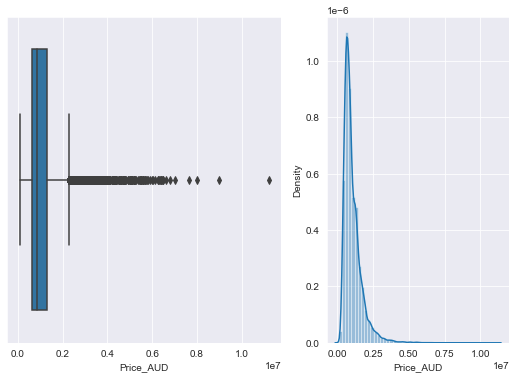

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


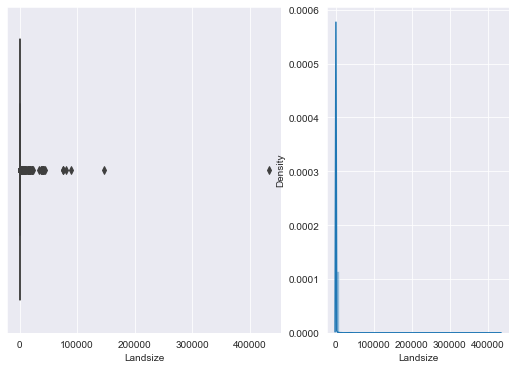

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


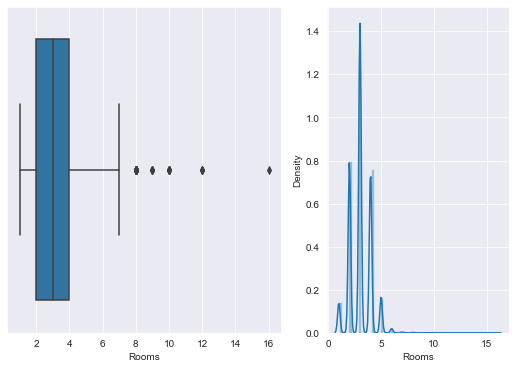

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


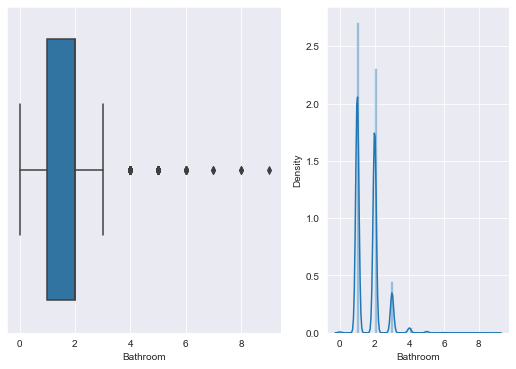

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


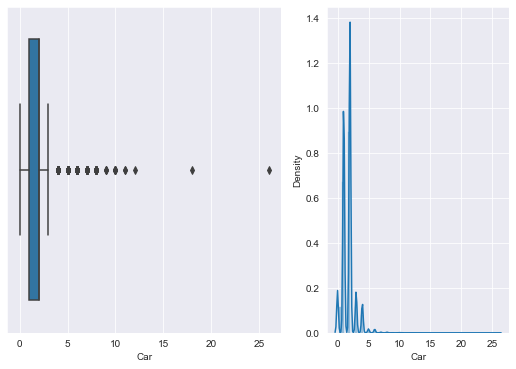

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


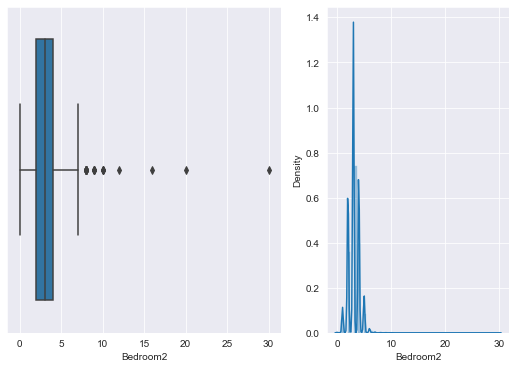

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


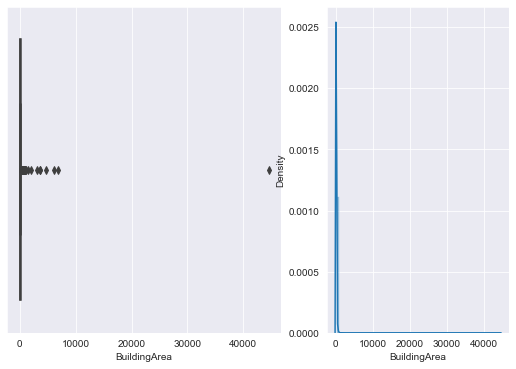

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


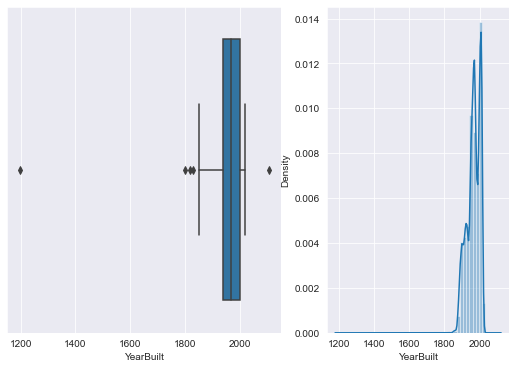

In [63]:
af.overview(df_houses, "Price_AUD")
af.overview(df_houses, "Landsize")
af.overview(df_houses, "Rooms")
af.overview(df_houses, "Bathroom")
af.overview(df_houses, "Car")
af.overview(df_houses, "Bedroom2")
af.overview(df_houses, "BuildingArea")
af.overview(df_houses, "YearBuilt")

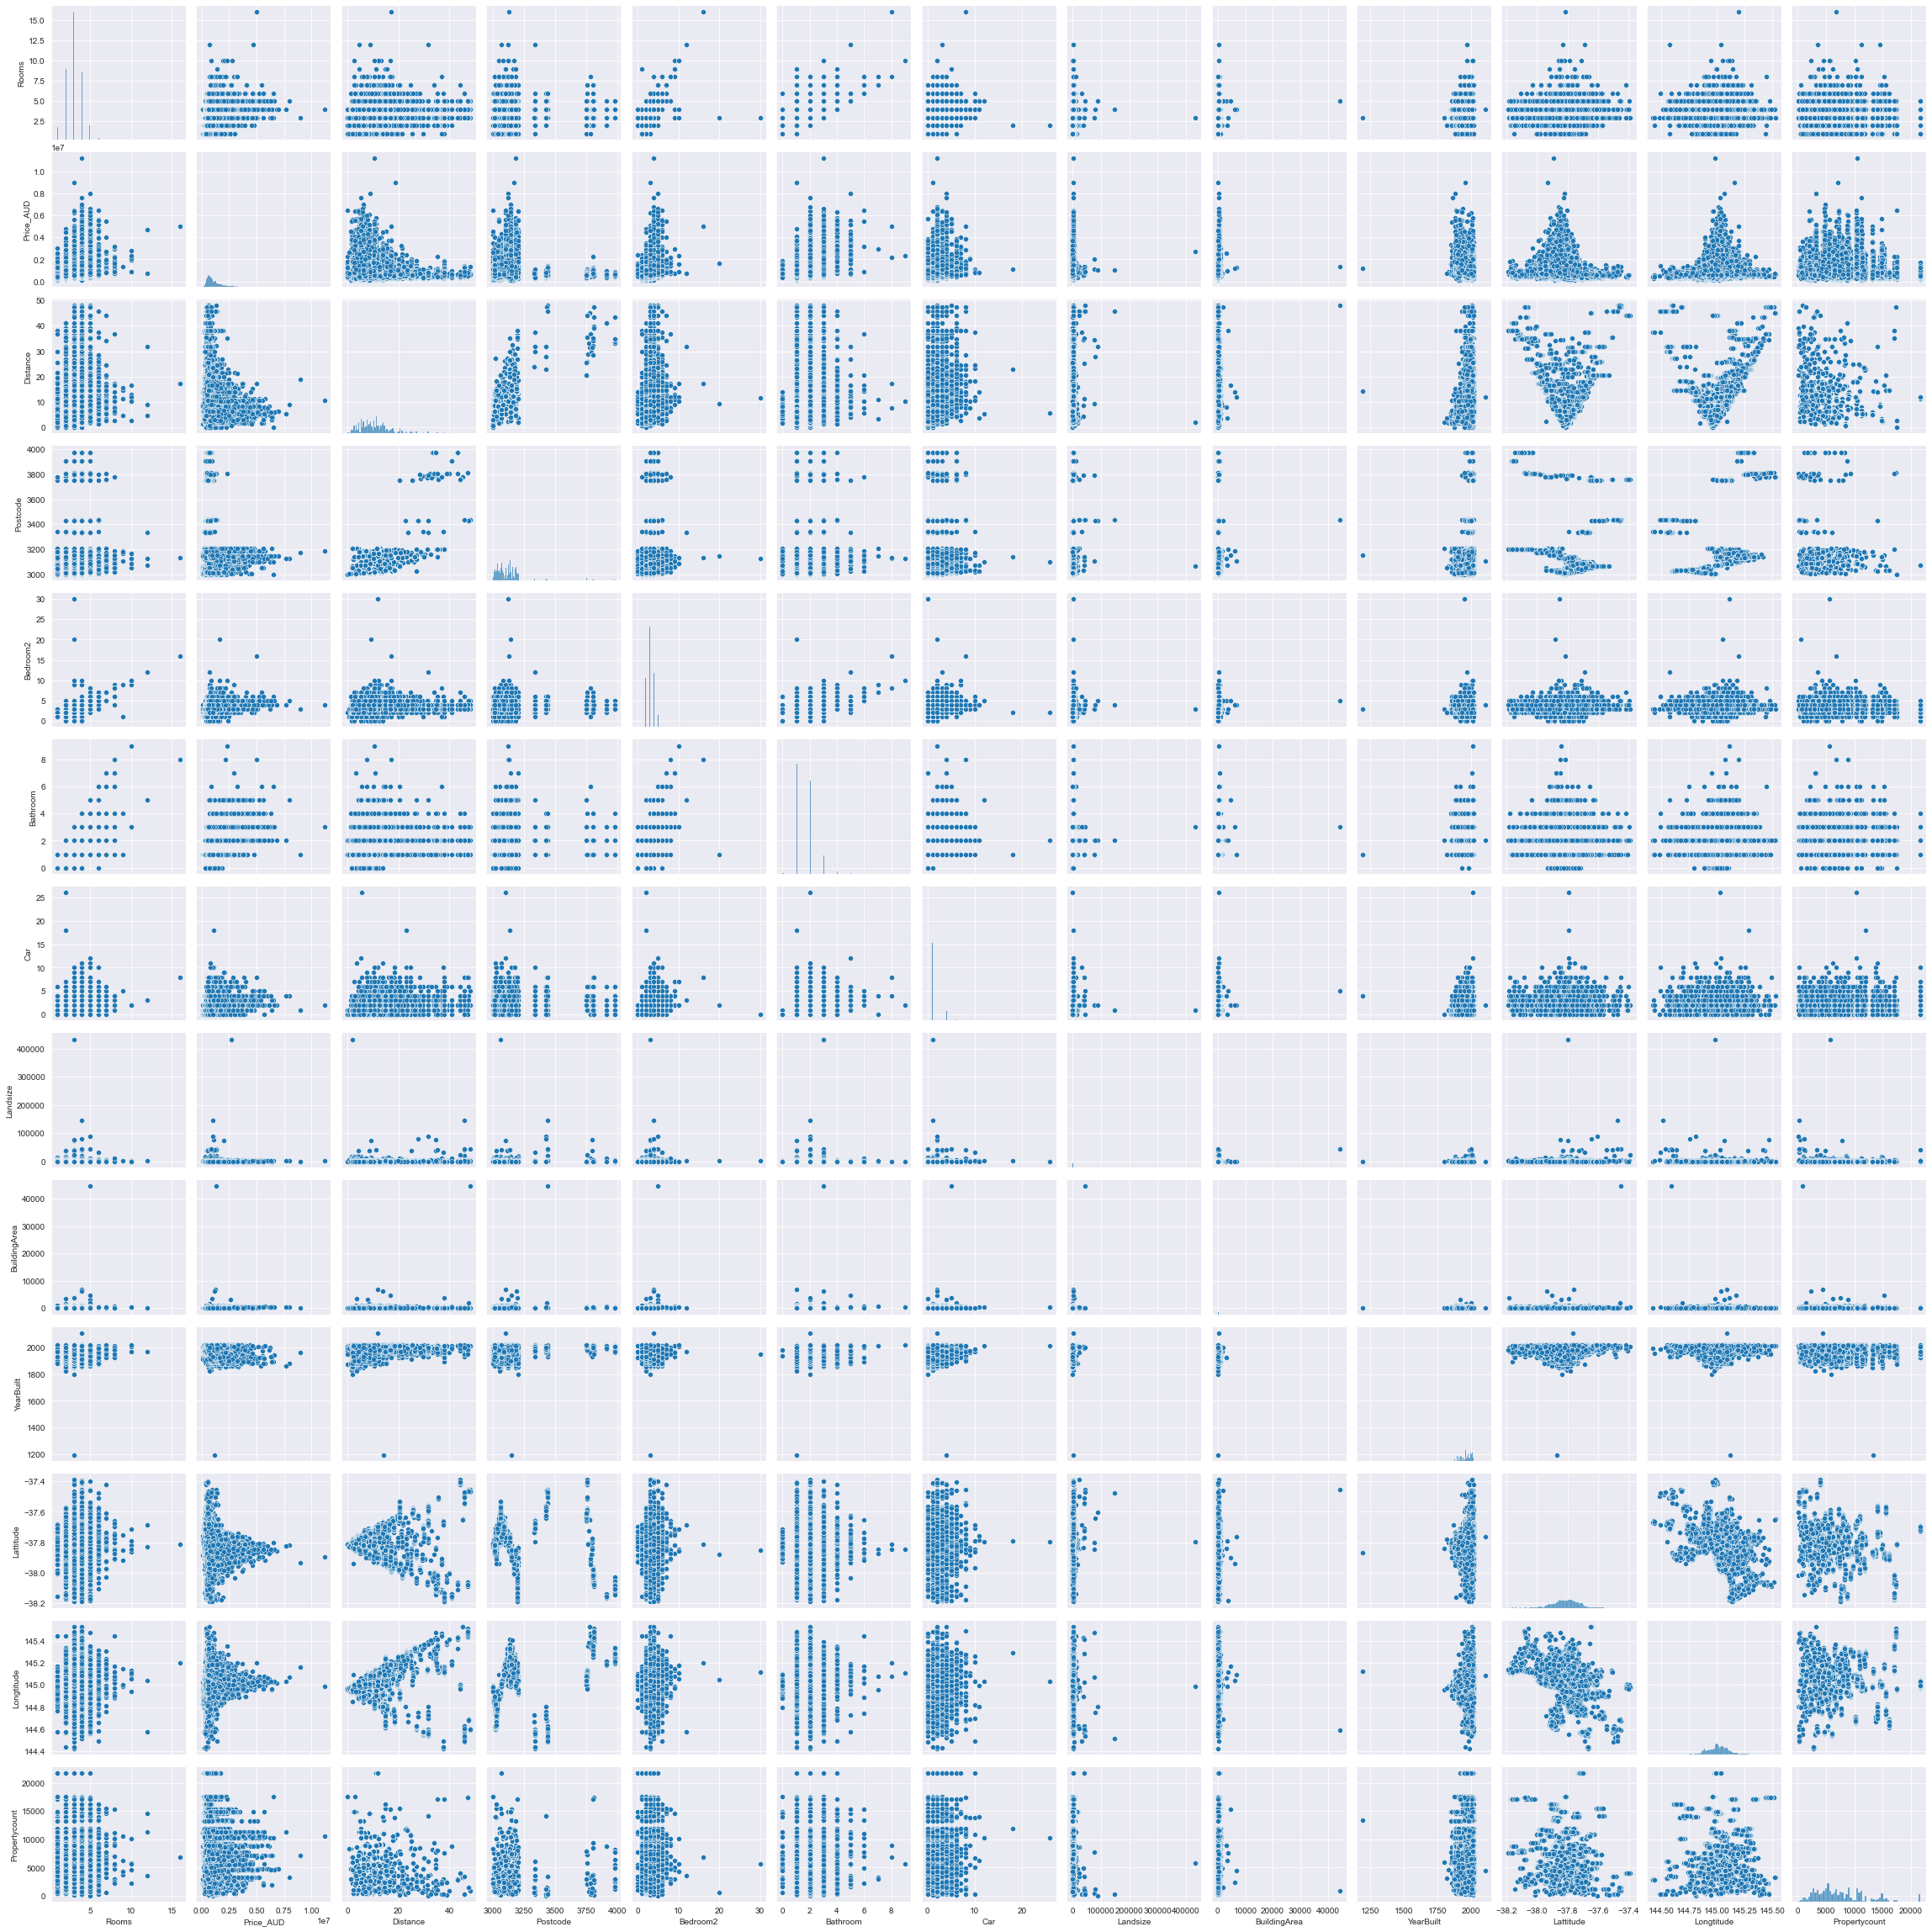

(None,
                   Rooms  Price_AUD  Distance  Postcode  Bedroom2  Bathroom  \
 Rooms          1.000000   0.465238  0.271511  0.085890  0.946755  0.621785   
 Price_AUD      0.465238   1.000000 -0.211384  0.044950  0.430275  0.430935   
 Distance       0.271511  -0.211384  1.000000  0.481566  0.269524  0.129081   
 Postcode       0.085890   0.044950  0.481566  1.000000  0.089292  0.120663   
 Bedroom2       0.946755   0.430275  0.269524  0.089292  1.000000  0.613054   
 Bathroom       0.621785   0.430935  0.129081  0.120663  0.613054  1.000000   
 Car            0.393878   0.201803  0.241835  0.067886  0.388491  0.307238   
 Landsize       0.037402   0.032748  0.060862  0.040664  0.037019  0.037058   
 BuildingArea   0.156229   0.100754  0.076301  0.042437  0.154157  0.147651   
 YearBuilt     -0.012749  -0.333306  0.323059  0.089805 -0.002022  0.170825   
 Lattitude      0.004872  -0.215607 -0.100417 -0.231027  0.003447 -0.057605   
 Longtitude     0.103235   0.197874  0.200946

/Users/janisfrolich/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


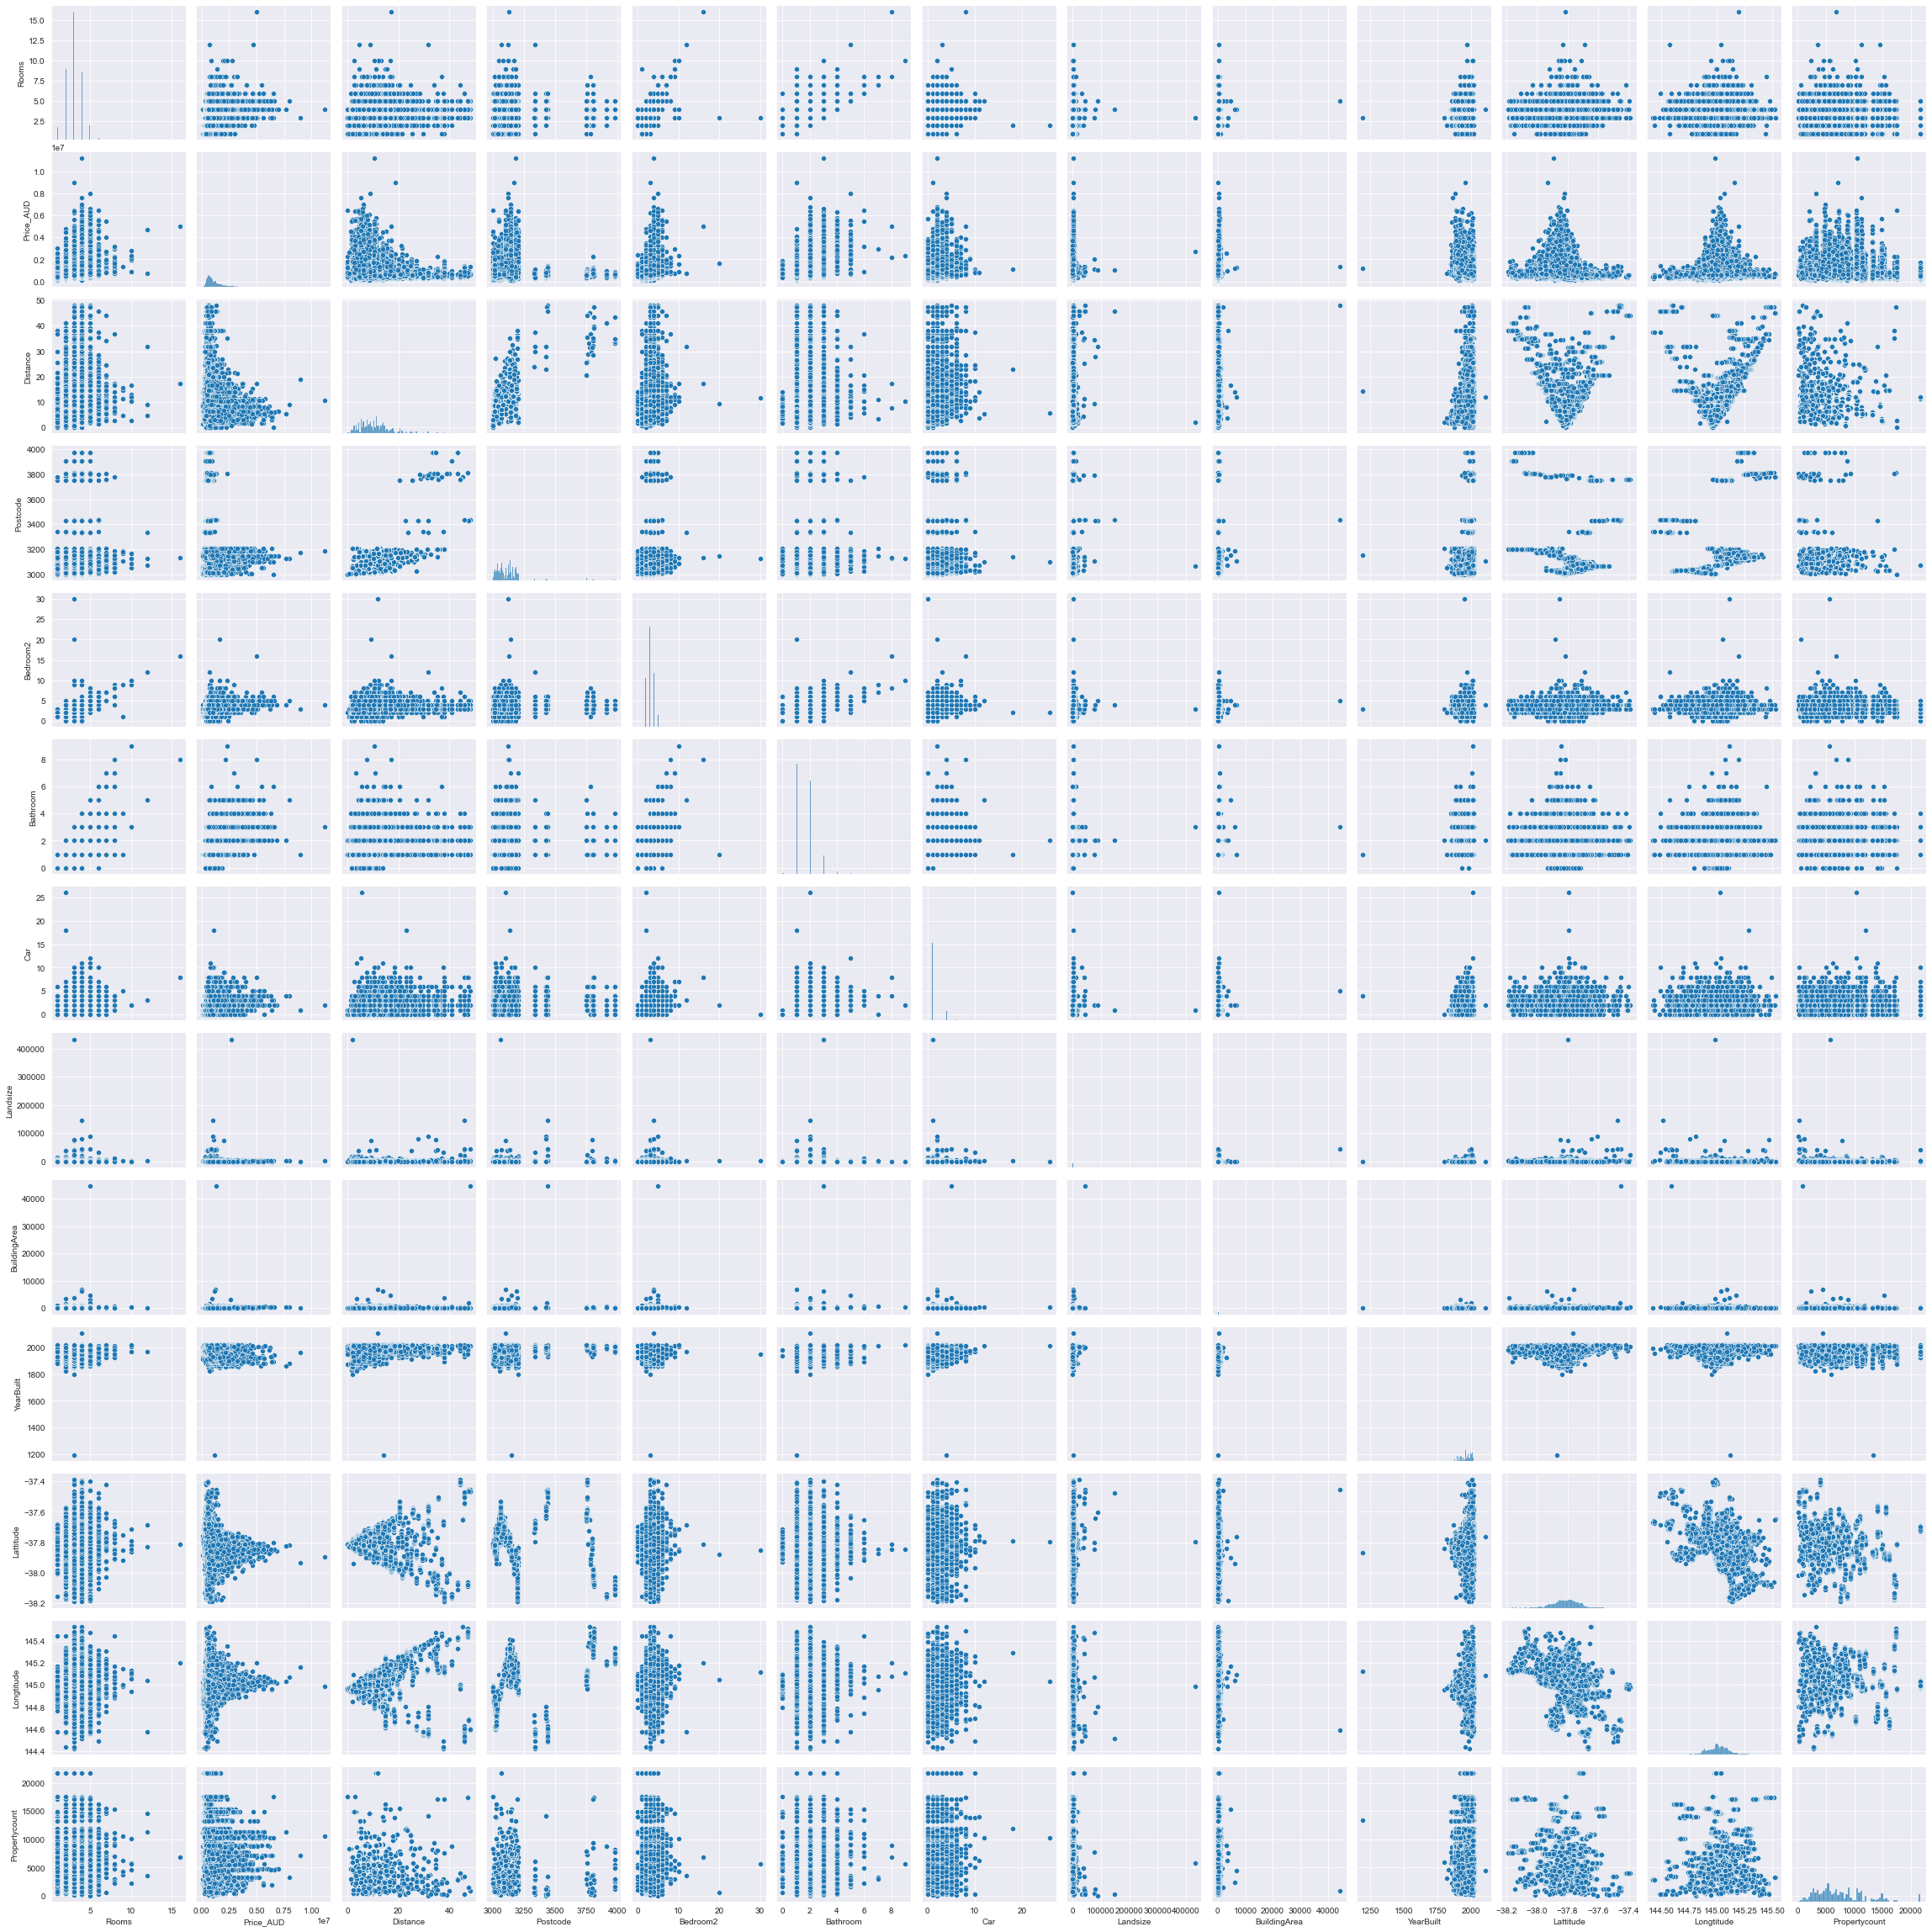

(None,
                   Rooms  Price_AUD  Distance  Postcode  Bedroom2  Bathroom  \
 Rooms          1.000000   0.465238  0.271511  0.085890  0.946755  0.621785   
 Price_AUD      0.465238   1.000000 -0.211384  0.044950  0.430275  0.430935   
 Distance       0.271511  -0.211384  1.000000  0.481566  0.269524  0.129081   
 Postcode       0.085890   0.044950  0.481566  1.000000  0.089292  0.120663   
 Bedroom2       0.946755   0.430275  0.269524  0.089292  1.000000  0.613054   
 Bathroom       0.621785   0.430935  0.129081  0.120663  0.613054  1.000000   
 Car            0.393878   0.201803  0.241835  0.067886  0.388491  0.307238   
 Landsize       0.037402   0.032748  0.060862  0.040664  0.037019  0.037058   
 BuildingArea   0.156229   0.100754  0.076301  0.042437  0.154157  0.147651   
 YearBuilt     -0.012749  -0.333306  0.323059  0.089805 -0.002022  0.170825   
 Lattitude      0.004872  -0.215607 -0.100417 -0.231027  0.003447 -0.057605   
 Longtitude     0.103235   0.197874  0.200946

In [64]:
af.corr_overview(df_houses)

In [65]:
# subset with all columns with missing values
df_houses_na = df_houses[df_houses.isnull().any(axis=1)]

In [66]:
df_houses_na

,Suburb,Address,Rooms,Type,Price_AUD,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-04-02,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-04-03,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,2016-06-08,2.5,3067.0,...,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.79650,144.99650,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34848,Wollert,16 Gunther Wy,4,h,621000.0,S,hockingstuart,2018-02-24,25.5,3750.0,...,2.0,2.0,375.0,NaN,NaN,Whittlesea City Council,-37.61331,145.03412,Northern Metropolitan,2940.0
34850,Wollert,15 Rockgarden Wy,3,h,NaN,SP,LJ,2018-02-24,25.5,3750.0,...,2.0,2.0,268.0,135.0,2016.0,Whittlesea City Council,-37.61094,145.04281,Northern Metropolitan,2940.0
34851,Yarraville,78 Bayview Rd,3,h,1101000.0,S,Jas,2018-02-24,6.3,3013.0,...,1.0,NaN,288.0,NaN,NaN,Maribyrnong City Council,-37.81095,144.88516,Western Metropolitan,6543.0
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,2018-02-24,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0


In [76]:
# describe all columns of datatype number and categorical
df_houses_na.describe(include='all', exclude="numpy.object")

ValueError: exclude must be None when include is 'all'